In [2]:
#Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from datetime import datetime


For this assigmnet, we are looking at customer behavior data on an app like Harvest that tracks company hours, and tracks invoices sent and payments received.

First we will do an EDA on the data, and generate insights using the customer data, and then we will look at some business problems like customer conversion and churn.

In [3]:
#read the csvs
df_customers = pd.read_csv('customers.csv')
df_invoices =  pd.read_csv('invoices_and_payments.csv')
df_expenses = pd.read_csv('expenses.csv')

df_customers['converted_at_date'] = pd.to_datetime(df_customers['converted_at'], infer_datetime_format=True)
df_invoices['invoice_created_at_date'] = pd.to_datetime(df_invoices['invoice_created_at'], infer_datetime_format=True)


In [5]:
#Print size/shape of dataframes
print(df_customers.shape)
print(df_invoices.shape)
print(df_expenses.shape)

(15028, 27)
(5214607, 16)
(5659162, 7)


In [7]:
####################################################################
## CUSTOMERS EDA
####################################################################

display(df_customers.columns)

#check for duplicate rows
print('\nDUPLICATE ROWS:')
print(df_customers.duplicated().sum())

#check for duplicate company_id rows
print('\nDUPLICATE ROWS WITH company_id:')
print(df_customers['company_id'].duplicated().sum())

categorical_cols = ['billing_frequency',
       'primary_industry_grouped', 'purpose',
       'asana_enabled',
        'slack_oauths', 'xero_enabled',
       'quickbooks_enabled', 'stripe_enabled', 'tdd_enabled',
       'team_module_enabled', 'expense_module_enabled',
       'invoice_module_enabled', 'estimate_module_enabled',
       'client_dash_module_enabled', 'approval_module_enabled', 
       'majority_platform', 'tracking_frequency']

#print unique values in each categorical column
print('\nUNIQUE VALUES IN EACH CATEGORICAL COLUMN:')
for col in df_customers:
    if col in categorical_cols:
        print(col,':', df_customers[col].unique())
        
#print columns that contain Null values
print('\nCOLUMNS THAT CONTAIN NULL VALUES:')
print(df_customers.isnull().sum()[df_customers.isnull().sum()>0])

#find inactive users 
print('\nNUMBER OF ROWS RETURNING 0')
print('invoices:', len(df_customers[df_customers['invoices']==0]))
print('payments:', len(df_customers[df_customers['payments']==0]))
print('total_hours:', len(df_customers[df_customers['total_hours']==0]))
print('total_users:', len(df_customers[df_customers['total_users']==0]))
print('projects:', len(df_customers[df_customers['projects']==0]))


df_customers

Index(['company_id', 'converted_at', 'billing_frequency',
       'primary_industry_grouped', 'total_users', 'devices', 'purpose',
       'invoices', 'projects', 'payments', 'asana_enabled',
       'google_calendar_users', 'slack_oauths', 'xero_enabled',
       'quickbooks_enabled', 'stripe_enabled', 'tdd_enabled',
       'team_module_enabled', 'expense_module_enabled',
       'invoice_module_enabled', 'estimate_module_enabled',
       'client_dash_module_enabled', 'approval_module_enabled', 'total_hours',
       'majority_platform', 'tracking_frequency', 'converted_at_date'],
      dtype='object')


DUPLICATE ROWS:
0

DUPLICATE ROWS WITH company_id:
0

UNIQUE VALUES IN EACH CATEGORICAL COLUMN:
billing_frequency : ['yearly' 'monthly']
primary_industry_grouped : ['_other' '_unknown' 'tech' 'marketing' 'architecture' 'nonprofit'
 'management consulting' 'engineering' 'design' 'healthcare' 'legal'
 'visual arts' 'construction' 'writing' 'accounting' 'events'
 'real estate' 'education' 'manufacturing' 'virtual assistant' 'music'
 'entertainment' 'ecommerce' 'retail' 'hospitality' 'research'
 'agriculture']
purpose : ['none' 'team' 'personal']
asana_enabled : [0 1]
slack_oauths : [0 1 2]
xero_enabled : [0 1]
quickbooks_enabled : [0 1]
stripe_enabled : [0 1]
tdd_enabled : [1 0]
team_module_enabled : [1 0]
expense_module_enabled : [1 0]
invoice_module_enabled : [1 0]
estimate_module_enabled : [0 1]
client_dash_module_enabled : [0 1]
approval_module_enabled : [1 0]
majority_platform : ['web' 'native' nan 'mix' 'other' 'integration' 'api']
tracking_frequency : ['weekly' 'daily' 'infrequent

,company_id,converted_at,billing_frequency,primary_industry_grouped,total_users,devices,purpose,invoices,projects,payments,...,team_module_enabled,expense_module_enabled,invoice_module_enabled,estimate_module_enabled,client_dash_module_enabled,approval_module_enabled,total_hours,majority_platform,tracking_frequency,converted_at_date
0,315309,2014-07-11 18:21:28 UTC,yearly,_other,0,14,none,2790,333,2669,...,1,1,1,0,0,1,37711.81,web,weekly,2014-07-11 18:21:28+00:00
1,438147,2015-08-27 19:58:50 UTC,yearly,_unknown,0,0,none,0,48,0,...,1,1,1,0,0,0,12876.50,web,weekly,2015-08-27 19:58:50+00:00
2,1156438,2020-09-04 07:18:11 UTC,yearly,tech,0,0,team,0,875,0,...,1,0,0,0,0,0,67383.95,web,daily,2020-09-04 07:18:11+00:00
3,262929,2014-01-27 15:50:30 UTC,yearly,marketing,0,7,none,0,1360,0,...,1,1,0,0,0,1,7694.30,web,infrequently,2014-01-27 15:50:30+00:00
4,194227,2013-04-02 03:26:27 UTC,yearly,_unknown,0,2,none,0,36,0,...,1,1,1,0,0,0,6.50,native,infrequently,2013-04-02 03:26:27+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15023,223993,2019-08-21 08:57:29 UTC,monthly,marketing,27,32,team,1105,1575,38,...,1,1,1,1,0,0,95749.11,web,infrequently,2019-08-21 08:57:29+00:00
15024,203538,2013-04-30 12:50:26 UTC,monthly,tech,27,90,none,1,556,0,...,1,1,1,1,0,1,360644.24,web,weekly,2013-04-30 12:50:26+00:00
15025,526538,2016-06-16 21:35:57 UTC,monthly,tech,27,41,none,0,1105,0,...,1,1,1,0,0,1,148852.91,web,daily,2016-06-16 21:35:57+00:00
15026,409087,2015-05-06 08:27:42 UTC,monthly,architecture,27,5,none,2,807,0,...,1,1,0,0,0,1,194963.09,web,daily,2015-05-06 08:27:42+00:00


In [8]:
#SUMMARY OF TOTAL RESULTS

#lifetime totals
print('Total number of customers:', df_customers['company_id'].count())
print('Total number of invoices sent:', df_customers['invoices'].sum())
print('Total number of payments received:', df_customers['payments'].sum())
print('Total number of projects:', df_customers['projects'].sum())
print('Total number of hours logged:', df_customers['total_hours'].sum())
print('Total number of users:', df_customers['total_users'].sum())

#print mean, max, and min for continuous columns
cont_columns = ['total_users', 'invoices', 'projects', 'payments', 'total_hours']
print('\nTABLE SUMMARY')
display(df_customers[['total_users', 'invoices', 'projects', 'payments', 'total_hours']].describe())



Total number of customers: 15028
Total number of invoices sent: 5054179
Total number of payments received: 4275499
Total number of projects: 4511062
Total number of hours logged: 419087684.2500009
Total number of users: 113558

TABLE SUMMARY


,total_users,invoices,projects,payments,total_hours
count,15028.000000,15028.000000,15028.000000,15028.000000,1.502800e+04
mean,7.556428,336.317474,300.177136,284.502196,2.788712e+04
std,20.082364,1232.339742,980.476202,1137.391476,9.549754e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,0.000000,16.000000,0.000000,7.269975e+02
50%,2.000000,27.000000,62.000000,10.000000,3.823510e+03
75%,7.000000,235.000000,227.000000,183.000000,1.799153e+04
max,700.000000,75885.000000,58470.000000,71180.000000,5.676045e+06


Using the customer data, we will plot some insights related to the customer's and the type of accounts they hold and their industry, invoices, and customer conversions over time.


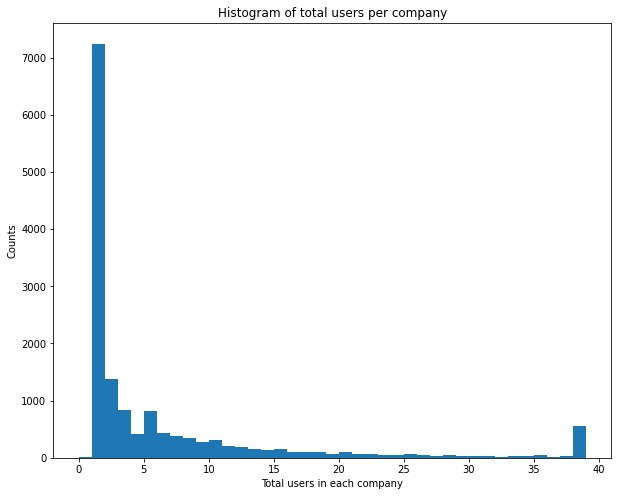

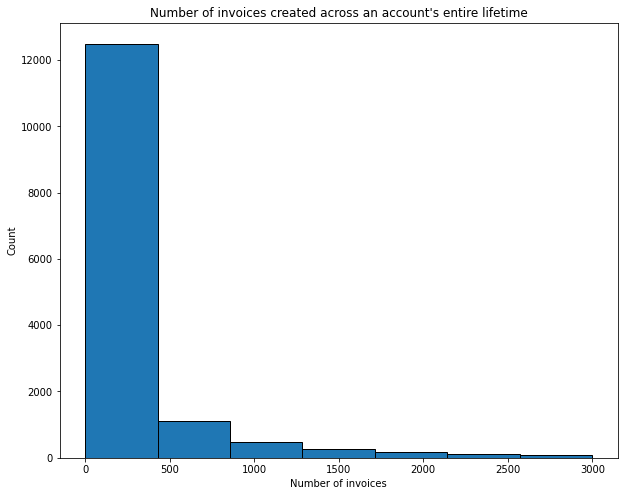

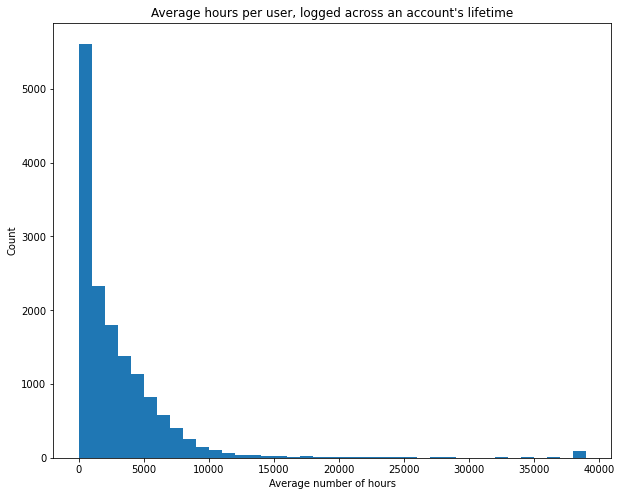

In [51]:
#plot number of customers vs purpose
purpose_counts = df_customers.groupby('purpose')[['company_id']].count().reset_index()
purpose_counts.columns = ['purpose', 'customer counts']
fig = px.bar(purpose_counts, x='purpose', y = 'customer counts', title='Count of customers by purpose type')

fig.update_layout(
    autosize=False,
    width=600,
    height=400)
fig.show()


#plot number of customers vs primary_industry_grouped
industry_counts = df_customers.groupby(['primary_industry_grouped', 'purpose'])[['company_id']].count().reset_index()
industry_counts.columns = ['industry', 'purpose', 'customer counts']
fig = px.bar(industry_counts, x="industry", y="customer counts", color="purpose", title="Count of customers, by purpose, in each industry")
fig.update_layout(
    autosize=False,
    width=900,
    height=800)
fig.show()

#plot TOTAL number of hours vs primary_industry_grouped
df = df_customers.groupby(['primary_industry_grouped'])[['total_users', 'invoices', 'projects', 'payments', 'total_hours']].sum().reset_index()
fig = px.bar(df, x="primary_industry_grouped", y="total_hours", title="Total hours logged by industry")
fig.show()

#plot MEAN number of hours vs primary_industry_grouped
df = df_customers.groupby(['primary_industry_grouped'])[['total_users', 'invoices', 'projects', 'payments', 'total_hours']].mean().reset_index()
df.columns = ['primary_industry_grouped','avg_no_users', 'avg_invoices', 'avg_no_projects', 'avg_no_payments', 'avg_hours']
fig = px.bar(df, x="primary_industry_grouped", y="avg_hours", title="Average hours logged by industry")
fig.show()


#plot histogram of total users per company
plt.figure(figsize=(10,8))
bins = np.arange(0,40,1)
plt.hist(np.clip(df_customers['total_users'], bins[0], bins[-1]), bins=bins)
plt.xlabel("Total users in each company")
plt.ylabel("Counts")
plt.title("Histogram of total users per company")
plt.show()

#plot histogram of number of invoices sent per company
plt.figure(figsize=(10,8))
bins1=np.linspace(df_customers['invoices'].min(),3000, 8) #outlier in this column skews range to 70K
plt.hist(df_customers['invoices'],bins=bins1, edgecolor='k',linewidth=1)
plt.xlabel("Number of invoices")
plt.ylabel("Count")
plt.title("Number of invoices created across an account's entire lifetime")
plt.show()

#plot histogram of average_hours spent per user per company
plt.figure(figsize=(10,8))
# bins1=np.linspace(df_customers['total_hours'].min(),200000, 10) #outlier in this column skews range to 70K
bins = np.arange(0,40000,1000)
df_customers['average_hours']=df_customers['total_hours']/df_customers['total_users']
plt.hist(np.clip(df_customers['average_hours'], bins[0], bins[-1]), bins=bins)
plt.xlabel("Average number of hours")
plt.ylabel("Count")
plt.title("Average hours per user, logged across an account's lifetime")
plt.show()

#plot a time series of the number of companies that converted to paying customers
df_customers['converted_at_date'] = pd.to_datetime(df_customers['converted_at'], utc=True)
df = df_customers.groupby(pd.Grouper(key='converted_at_date', freq='M'))['company_id'].count().reset_index()
df.columns = ['converted_at_date', 'number_of_companies']
fig = px.line(df, x='converted_at_date', y="number_of_companies", title='Customer conversion over time')
fig.show()



#plot a time series of the number of companies that converted to paying customers (aggregated by purpose!)
# df_customers['converted_at_date'] = pd.to_datetime(df_customers['converted_at'], utc=True)
df = df_customers.groupby([pd.Grouper(key='converted_at_date', freq='M'), 'purpose'])['company_id'].count().reset_index()
df.columns = ['converted_at_date', 'purpose','number_of_companies']

fig = px.line(df, x='converted_at_date', y="number_of_companies", color='purpose', title='Customers conversion over time (by purpose)')
fig.show()


#plot a time series of the number of companies that converted to yearly vs monthly paying customers
df = df_customers.groupby([pd.Grouper(key='converted_at_date', freq='M'), 'billing_frequency'])['company_id'].count().reset_index()
df.columns = ['converted_at_date', 'billing_frequency','number_of_companies']
fig = px.line(df, x='converted_at_date', y="number_of_companies", color='billing_frequency', title='Customers conversion over time (by billing frequency)')
fig.show()


Number of customers vs the purpose
- There are more personal account types than team accounts on the platform; however, majority of the users select "None".

Number of customers vs the primary_industry_grouped
- Tech, marketing and management consulting dominate the known industry fields. 


Total number of hours logged & average hours logged by industry
- While tech may have the most number of hours logged, the average hours logged graph shows us that manufacturing and engineering spend more time on the platform on average. Since the average hours is determined by the number of users in the team using the platform, it's more indicative of the usage than total hours.

Histogram of total users per company, total invoices sent, and average hours spent
- In all these graphs above, we see a long-tailed distribution, which makes sense because the distribution can't be below 0 and we expect anomolies (like time spent) to skew the data.

Time series of the number of companies that converted to paying customers by purpose, and by billing_frequency
- The customer conversion has substantially grown since 2006 - 2022. It appears that in Feb 2018, the company introduced the "purpose" feature which lets users determine wether their account is for personal or team uses. We can see that the personal account type is growing faster than the team account type. From the last graph, we see that the monthly billing frequency is much more popular than the yearly billing frequency.

In [28]:
####################################################################
# EXPENSES EDA
####################################################################

#Re-format expenses dataframe and add a few new features
billable_expenses_aggregated=df_expenses.loc[df_expenses['is_billable']==1,['company_id','invoice_id','total_cost','units']].groupby(['company_id','invoice_id']).sum().reset_index()
billable_expenses_aggregated=billable_expenses_aggregated.rename(columns={'total_cost':'total_billable_cost','units':'total_billable_units'})
nonbillable_expenses_aggregated=df_expenses.loc[df_expenses['is_billable']==0,['company_id','invoice_id','total_cost','units']].groupby(['company_id','invoice_id']).sum().reset_index()
nonbillable_expenses_aggregated=nonbillable_expenses_aggregated.rename(columns={'total_cost':'total_nonbillable_cost','units':'total_nonbillable_units'})

expenses_aggregated=pd.merge(billable_expenses_aggregated,nonbillable_expenses_aggregated,on=['company_id','invoice_id'],how='outer').fillna(0)
expenses_aggregated['billable_cost_percentage']=(100.0*expenses_aggregated['total_billable_cost']/(expenses_aggregated['total_billable_cost']+expenses_aggregated['total_nonbillable_cost'])).apply(lambda x: round(x,2))
expenses_aggregated['nonbillable_cost_percentage']=(100.0*expenses_aggregated['total_nonbillable_cost']/(expenses_aggregated['total_billable_cost']+expenses_aggregated['total_nonbillable_cost'])).apply(lambda x: round(x,2))

#Drop negative total billables/nonbillables
expenses_aggregated=expenses_aggregated.loc[(expenses_aggregated['billable_cost_percentage']>=0)&
                                            (expenses_aggregated['nonbillable_cost_percentage']>=0)]

display(expenses_aggregated)

#We should convert all billable costs to a standardized currency (USD) in order to compare them on the same scale,
#to do this, we should merge expenses_aggregated with the invoices dataframe in order to get the currency feature



,company_id,invoice_id,total_billable_cost,total_billable_units,total_nonbillable_cost,total_nonbillable_units,billable_cost_percentage,nonbillable_cost_percentage
0,1417,0,14634.19,85.00,34375.00,275.0,29.86,70.14
1,1628,0,789.54,7.00,0.00,0.0,100.00,0.00
2,2327,0,18134.42,1290.00,0.00,0.0,100.00,0.00
3,2327,1,105245.49,40349.87,0.00,0.0,100.00,0.00
4,2327,953657,1280.00,1.00,0.00,0.0,100.00,0.00
...,...,...,...,...,...,...,...,...
390924,1411306,0,0.00,0.00,44.82,1.0,0.00,100.00
390925,1412117,0,0.00,0.00,2662.83,11.0,0.00,100.00
390926,1414059,0,0.00,0.00,1720.00,2.0,0.00,100.00
390927,1414483,0,0.00,0.00,265500.00,9.0,0.00,100.00


In [29]:
####################################################################
## INVOICES EDA
####################################################################

#Merge in the expenses_aggregated dataframe on company_id and invoice_id
df_invoices_and_expenses=pd.merge(df_invoices, expenses_aggregated, on=['company_id','invoice_id'], how='left')
# Number of invoice data rows that merged with the expenses_aggregated dataframe
print("Percentage of invoice data with merged expenses information:",str(round(100.0*df_invoices_and_expenses.loc[~df_invoices_and_expenses['total_billable_cost'].isna()].shape[0]/df_invoices_and_expenses['total_billable_cost'].isna().sum(),2))+"%")
display(df_invoices_and_expenses)


Percentage of invoice data with merged expenses information: 8.4%


,company_id,invoice_id,recurring_invoice_id,invoice_created_at,invoice_sent_at,invoice_state,invoice_amount,currency,currency_code,imported_to_quickbooks,...,payment_created_at,paid_at,payment_amount,invoice_created_at_date,total_billable_cost,total_billable_units,total_nonbillable_cost,total_nonbillable_units,billable_cost_percentage,nonbillable_cost_percentage
0,612957,25740109,NaN,2020-10-16 01:27:54 UTC,2020-10-16 01:35:40 UTC,open,384415.50,Jamaican Dollar - JMD,JMD,0,...,NaN,NaN,NaN,2020-10-16 01:27:54+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,274327,14430600,NaN,2017-11-07 19:19:20 UTC,2017-11-07 19:20:06 UTC,open,22063.32,Brazilian Real - BRL,BRL,0,...,NaN,NaN,NaN,2017-11-07 19:19:20+00:00,22063.32,41.0,0.0,0.0,100.0,0.0
2,359036,33084769,NaN,2022-07-06 03:51:28 UTC,2022-07-04 05:00:00 UTC,open,28518.00,United Arab Emirates Dirham - AED,AED,0,...,NaN,NaN,NaN,2022-07-06 03:51:28+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,40237,10979856,NaN,2016-10-25 12:31:57 UTC,2016-10-27 09:20:33 UTC,open,7500.00,Israeli New Sheqel - ILS,ILS,0,...,NaN,NaN,NaN,2016-10-25 12:31:57+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,456494,30922632,NaN,2022-01-11 13:38:13 UTC,2022-01-11 13:38:18 UTC,open,180000.00,Russian Ruble - RUB,RUB,0,...,NaN,NaN,NaN,2022-01-11 13:38:13+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214602,12641,26082008,NaN,2020-11-17 05:24:06 UTC,2020-11-17 14:19:17 UTC,closed,1000.00,United States Dollar - USD,USD,0,...,NaN,NaN,NaN,2020-11-17 05:24:06+00:00,NaN,NaN,NaN,NaN,NaN,NaN
5214603,123236,3401984,NaN,2013-09-23 21:19:00 UTC,2013-09-23 21:19:10 UTC,closed,176.00,United States Dollar - USD,USD,0,...,2013-09-29 21:59:07 UTC,2013-09-29 00:00:00 UTC,165.0,2013-09-23 21:19:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
5214604,170673,6338090,NaN,2015-02-17 15:07:46 UTC,2015-02-17 15:11:47 UTC,closed,1671.25,United States Dollar - USD,USD,0,...,2015-02-17 15:07:46 UTC,2015-02-17 00:00:00 UTC,1015.0,2015-02-17 15:07:46+00:00,NaN,NaN,NaN,NaN,NaN,NaN
5214605,503805,32495677,NaN,2022-05-23 15:45:58 UTC,2022-05-23 19:12:36 UTC,closed,12.00,United States Dollar - USD,USD,0,...,NaN,NaN,NaN,2022-05-23 15:45:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN


Using the invoices data, we can take a look at when companies were last active by using the data they last sent an invoice (we could have also used payments). Since we don't have data with the times they logged in, we are going to assume the invoices give us an idea about their activity.

In [10]:
#plot a graph of companies vs the data of the last invoice sent 
df = df_invoices.groupby('company_id')[['invoice_created_at']].max().reset_index()
df['invoice_created_at_date'] = pd.to_datetime(df['invoice_created_at'], utc=True)
df = df.groupby(pd.Grouper(key='invoice_created_at_date', freq='Y'))['company_id'].count().reset_index()
df.columns = ['invoice_created_at_date', 'number_of_companies']

fig = px.bar(df, x='invoice_created_at_date', y="number_of_companies", title='Number of companies v.s year last invoice was sent')
fig.show()


In the next section, I will take a look at customer conversion and churn to see if we can develop any new insights using the data.


### Customer Conversion

Since we don't have any data about the customer's behavior prior to the date they converted (ex. when they first joined the platform), we have to make some assumptions. We are going to assume that the date they sent an invoice (prior to their conversion date) is their first day on the platform.

By calculating the days between their first invoice and the conversion date, we can calculate the length of time before a customer converts & plot it on a histogram to observe the distribution of this data.

<ipython-input-31-1455af7ee135>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



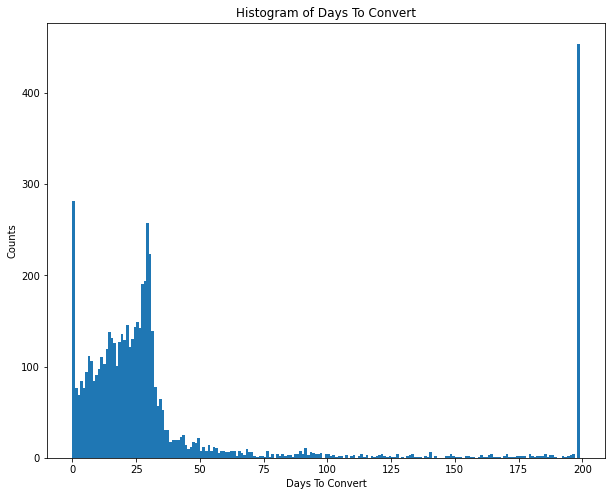

Numbers below are for converted customers who created an invoice before converting:
Percentage of Users that Convert by the 7-Day mark: 15.95
Percentage of Users that Convert by the 14-Day mark: 29.13
Percentage of Users that Convert by the 21-Day mark: 45.03
Percentage of Users that Convert by the 30-Day mark: 72.53
Percentage of Users that Convert by the 60-Day mark: 86.11
Percentage of Users that Convert by the 365-Day mark: 94.43


In [31]:
#1) Customer Conversion 

conversion_df=pd.merge(df_customers[['company_id','converted_at_date']].groupby('company_id').min().reset_index(),
         df_invoices_and_expenses[['company_id','invoice_created_at_date']].groupby('company_id').min().reset_index(),
         on='company_id',how='left').dropna()

converted_df = conversion_df.loc[conversion_df['invoice_created_at_date']<conversion_df['converted_at_date']]
converted_df['days_to_convert']=(converted_df['converted_at_date'] - converted_df['invoice_created_at_date']).apply(lambda x: x.days)
# display(converted_df)

#plot histogram of total users per company
plt.figure(figsize=(10,8))
bins = np.arange(0,200,1)
plt.hist(np.clip(converted_df['days_to_convert'], bins[0], bins[-1]), bins=bins)
plt.xlabel("Days To Convert")
plt.ylabel("Counts")
plt.title("Histogram of Days To Convert")
plt.show()

print("Numbers below are for converted customers who created an invoice before converting:")
print("Percentage of Users that Convert by the 7-Day mark:",round(100.0*converted_df.loc[converted_df['days_to_convert']<=7].shape[0]/converted_df.shape[0],2))
print("Percentage of Users that Convert by the 14-Day mark:",round(100.0*converted_df.loc[converted_df['days_to_convert']<=14].shape[0]/converted_df.shape[0],2))
print("Percentage of Users that Convert by the 21-Day mark:",round(100.0*converted_df.loc[converted_df['days_to_convert']<=21].shape[0]/converted_df.shape[0],2))
print("Percentage of Users that Convert by the 30-Day mark:",round(100.0*converted_df.loc[converted_df['days_to_convert']<=30].shape[0]/converted_df.shape[0],2))
print("Percentage of Users that Convert by the 60-Day mark:",round(100.0*converted_df.loc[converted_df['days_to_convert']<=60].shape[0]/converted_df.shape[0],2))
print("Percentage of Users that Convert by the 365-Day mark:",round(100.0*converted_df.loc[converted_df['days_to_convert']<=365].shape[0]/converted_df.shape[0],2))



The graph above shows data from customers who converted and their days to conversion. Again, since we don't have the date when they joined the platform as a free user, we are assuming that the first invoice date is the creation date. From the graph above, we see that for users who converted, 72% of them did so before 30 days. This is an interesting result that makes sense because Harvest has a 30 day free trial!

Unfortunately, we can't determine features that predict a customer will convert because we do not have the data for customers who churned before becoming a paying customer.


### Customer  Engagement Churn
Technically, we can't predict "churn" in the sense that a customer stopped paying and using the platform, but we can look at engagement churn. We have to make the following assumptions:

- Assumption 1: Churn is defined as a customer who haven't created an invoice in a specific number of days (to be determined)
- Assumption 2: Customers who churn on engagement don't return


99th percentile: 75.0


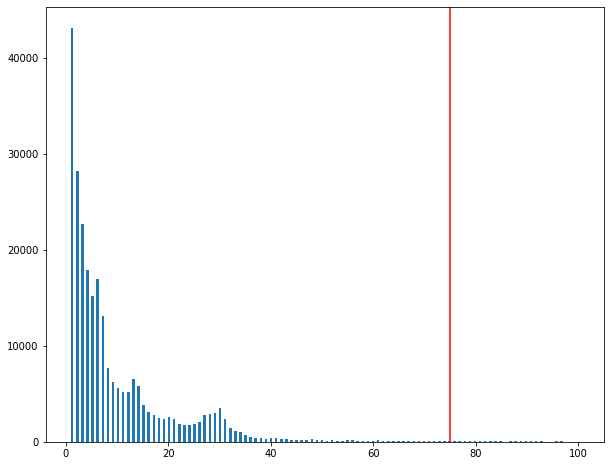

In [41]:
#Create definition for Engagement Churn

def engagement_churn_level():
    dfstmp=[]
    for g in df_invoices_and_expenses[['company_id','invoice_created_at_date']].sort_values(by=['company_id','invoice_created_at_date']).groupby('company_id'):
        g[1]['days_between_invoices']=(g[1]['invoice_created_at_date']-g[1]['invoice_created_at_date'].shift(1)).dt.days
        dfstmp.append(g[1][['company_id','invoice_created_at_date','days_between_invoices']])
    time_between_invoices_df=pd.concat(dfstmp,ignore_index=True).dropna()

    #plot histogram of time in between invoices sent
    plt.figure(figsize=(10,8))
    #Use 99th quantile to determine churn
    plt.hist(time_between_invoices_df['days_between_invoices'].sample(n=1000000),bins=np.linspace(1,100,200))
    q=np.quantile(time_between_invoices_df.loc[time_between_invoices_df['days_between_invoices']>0,'days_between_invoices'],0.99)
    plt.axvline(q,color='r')
    print("99th percentile:",q)
    plt.show()

    return time_between_invoices_df,q

time_between_invoices_df,qfilter=engagement_churn_level()


The above graph shows the time in between the invoices sent across all companies in the data. We can use anomoly detection to determine longer than usual time between invoices. The 99th percentile of this distribution corresponds to 75 days. We can determine that companies who haven't sent an invoice in over 75 days are churned (on engagement).


In [43]:
#find customers who haven't sent an invoice in over 75 days
churned_customers = time_between_invoices_df[time_between_invoices_df['days_between_invoices']>75]
churned_customers

,company_id,invoice_created_at_date,days_between_invoices
2097,2945,2007-12-10 00:00:00+00:00,139.0
2253,2945,2013-08-28 01:00:55+00:00,131.0
2270,2945,2014-11-21 15:56:09+00:00,118.0
2271,2945,2015-03-10 02:34:34+00:00,108.0
2272,2945,2015-08-13 14:35:02+00:00,156.0
...,...,...,...
5209086,1372191,2022-07-04 22:41:04+00:00,126.0
5209891,1375418,2022-06-01 17:13:19+00:00,111.0
5210160,1377133,2022-06-15 12:42:42+00:00,119.0
5211425,1384731,2022-07-21 15:07:56+00:00,78.0


In [46]:
#plot their churn rate over time

#plot a time series of the number of companies that converted to yearly vs monthly paying customers
df = churned_customers.groupby(pd.Grouper(key='invoice_created_at_date', freq='M'))['company_id'].count().reset_index()
df.columns = ['churned_date','number_of_companies']
fig = px.line(df, x='churned_date', y="number_of_companies", title='Time series of customers who churned on engagement (have not sent an invoice in over 75 days)')
fig.show()

The graph above illustrates customer engagement churn over time, or in other words, customers who have not sent an invoice in 75 days. One thing to note is that customers can be double counted here, so if there are two periods of time that a customer hasn't sent an invoice for 75 days, then that customer will be counted twice.

Comparing this graph to the customer conversion graph, it appears that the rate of conversion is similar to engagement churn. Of course, this is a simplistic understanding of churn, and it's possible that customers may still be using the platform to log hours even if they are not sending invoices. Keeping that in mind, we can still suggest reminders to customers if they have not been "active" for a long period of time to increase retention.